In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics


In [4]:
df = pd.read_csv("/workspaces/Series-Temporales-DiegoAmorin33/Aquifer_Auser.csv")

df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

df.columns = [
    'date',
    'rainfall',
    'depth_to_groundwater',
    'temperature',
    'drainage_volume',
    'river_hydrometry'
]

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df = df.sort_values('date')
df = df.interpolate()


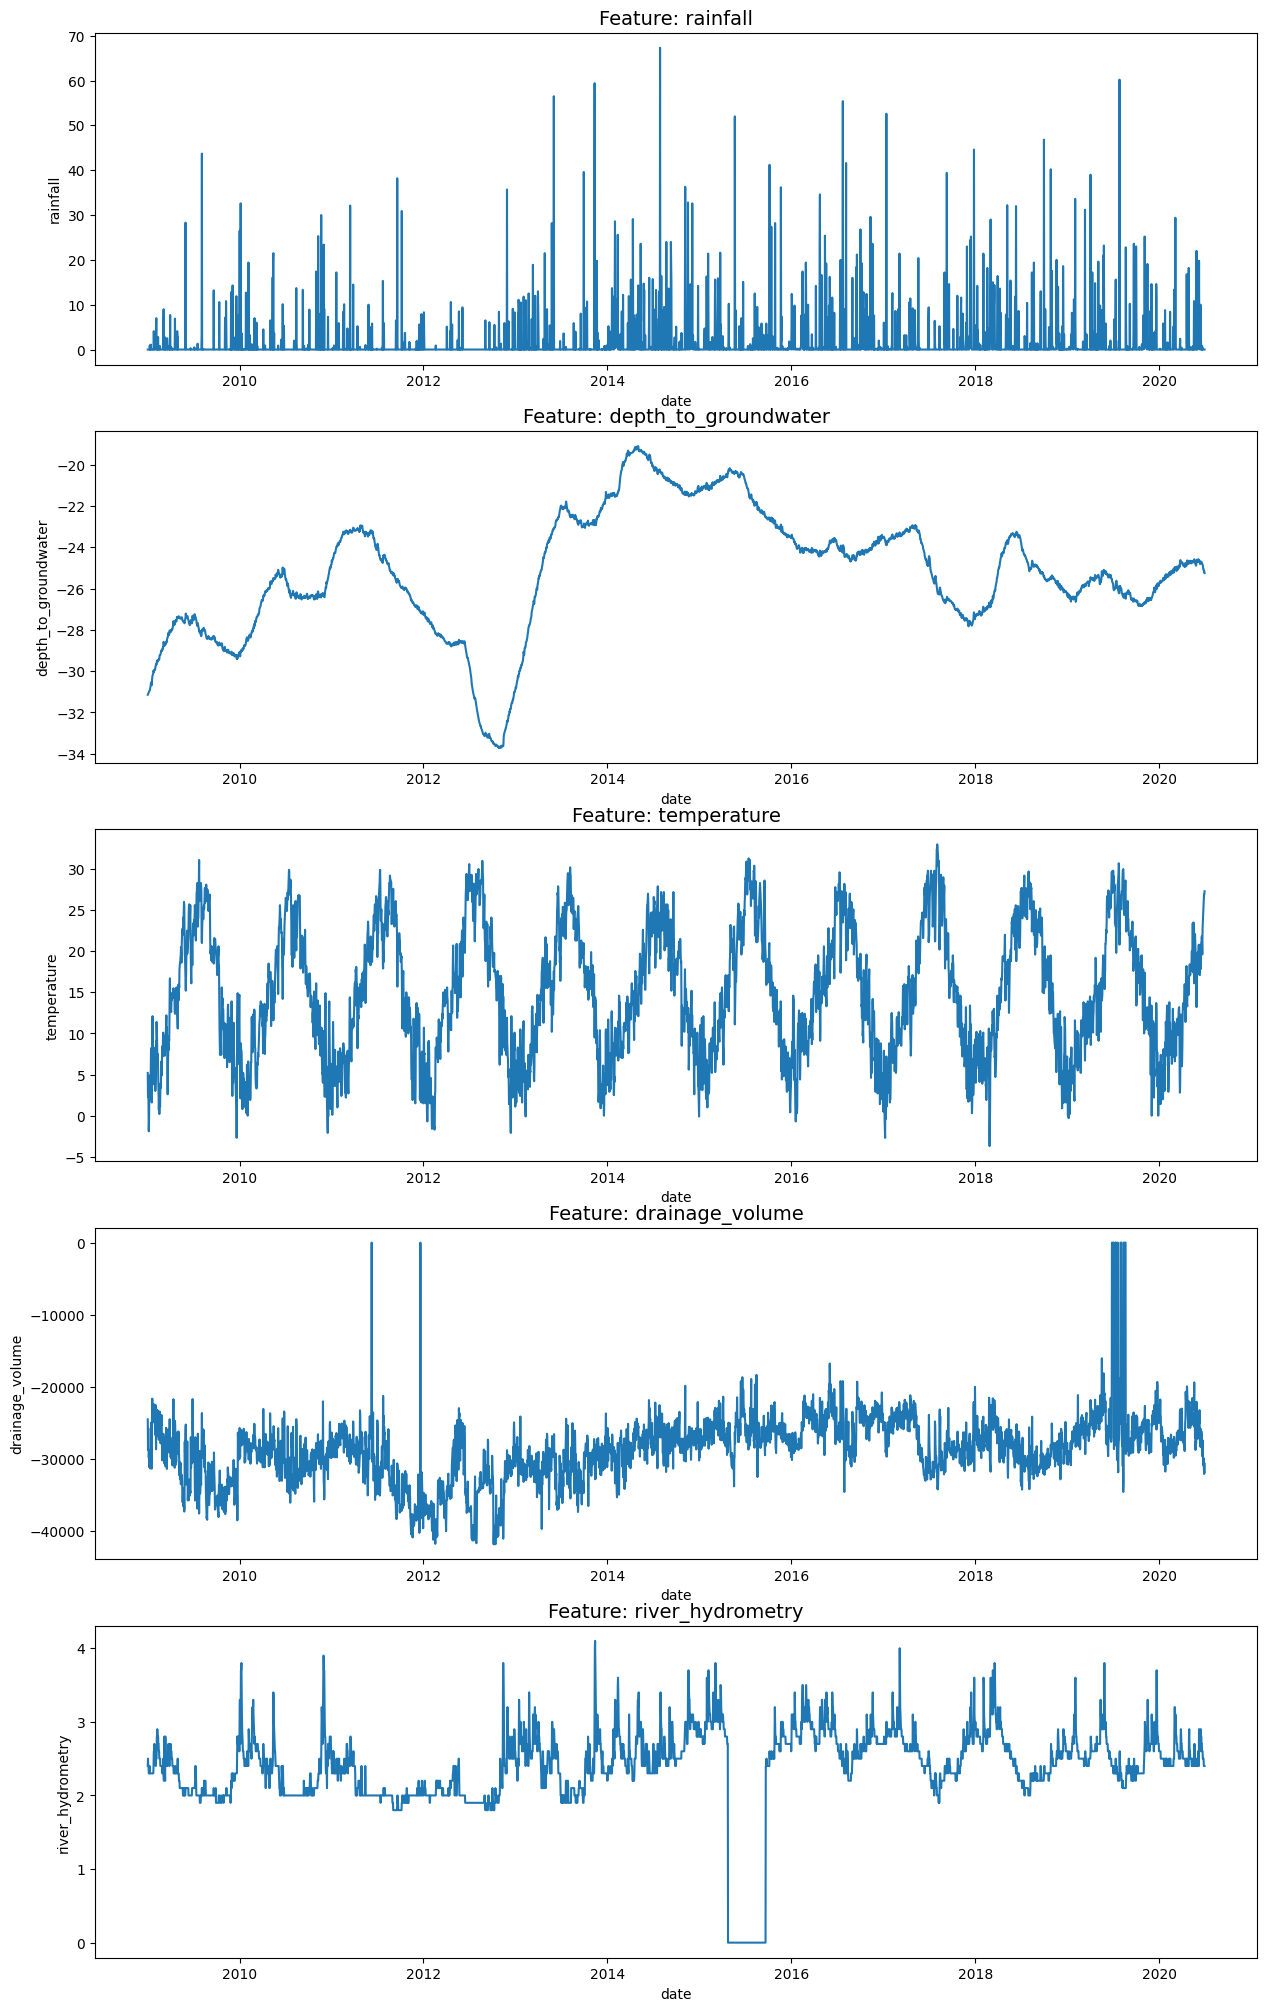

In [5]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column], ax=ax[i])
    ax[i].set_title(f'Feature: {column}', fontsize=14)


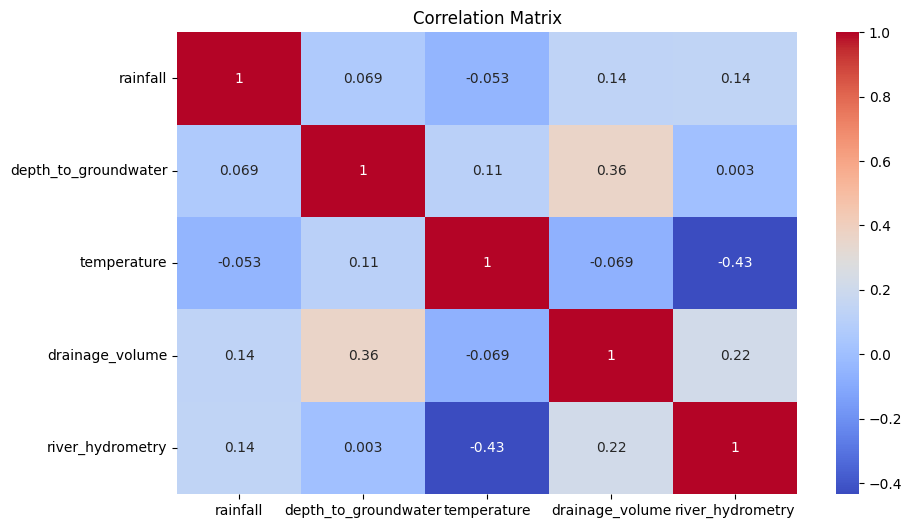

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('date', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [7]:
prophet_df = df.copy()

prophet_df.rename(columns={
    'date': 'ds',
    'depth_to_groundwater': 'y'
}, inplace=True)


In [8]:
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 5.0, 10.0]
}

best_rmse = float('inf')
best_params = None

for cps in param_grid['changepoint_prior_scale']:
    for sps in param_grid['seasonality_prior_scale']:

        model = Prophet(
            changepoint_prior_scale=cps,
            seasonality_prior_scale=sps
        )

        for col in ['rainfall', 'temperature', 'drainage_volume', 'river_hydrometry']:
            model.add_regressor(col)

        model.fit(prophet_df)

        df_cv = cross_validation(
            model,
            initial='1000 days',
            period='180 days',
            horizon='365 days'
        )

        df_perf = performance_metrics(df_cv)
        rmse = df_perf['rmse'].mean()

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (cps, sps)

print("Best params:", best_params)
print("Best RMSE:", best_rmse)


14:14:45 - cmdstanpy - INFO - Chain [1] start processing
14:14:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/16 [00:00<?, ?it/s]

14:14:47 - cmdstanpy - INFO - Chain [1] start processing
14:14:47 - cmdstanpy - INFO - Chain [1] done processing
14:14:47 - cmdstanpy - INFO - Chain [1] start processing
14:14:48 - cmdstanpy - INFO - Chain [1] done processing
14:14:48 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] done processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:50 - cmdstanpy - INFO - Chain [1] done processing
14:14:50 - cmdstanpy - INFO - Chain [1] start processing
14:14:51 - cmdstanpy - INFO - Chain [1] done processing
14:14:51 - cmdstanpy - INFO - Chain [1] start processing
14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing
14:14:53 - cmdstanpy - INFO - Chain [1] done processing
14:14:53 - cmdstanpy - INFO - Chain [1] start processing
14:14:54 - cmdstanpy - INFO - Chain [1] done processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:55 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:08 - cmdstanpy - INFO - Chain [1] done processing
14:15:08 - cmdstanpy - INFO - Chain [1] start processing
14:15:09 - cmdstanpy - INFO - Chain [1] done processing
14:15:09 - cmdstanpy - INFO - Chain [1] start processing
14:15:10 - cmdstanpy - INFO - Chain [1] done processing
14:15:10 - cmdstanpy - INFO - Chain [1] start processing
14:15:11 - cmdstanpy - INFO - Chain [1] done processing
14:15:11 - cmdstanpy - INFO - Chain [1] start processing
14:15:12 - cmdstanpy - INFO - Chain [1] done processing
14:15:12 - cmdstanpy - INFO - Chain [1] start processing
14:15:13 - cmdstanpy - INFO - Chain [1] done processing
14:15:13 - cmdstanpy - INFO - Chain [1] start processing
14:15:14 - cmdstanpy - INFO - Chain [1] done processing
14:15:14 - cmdstanpy - INFO - Chain [1] start processing
14:15:16 - cmdstanpy - INFO - Chain [1] done processing
14:15:16 - cmdstanpy - INFO - Chain [1] start processing
14:15:17 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

14:15:30 - cmdstanpy - INFO - Chain [1] start processing
14:15:30 - cmdstanpy - INFO - Chain [1] done processing
14:15:30 - cmdstanpy - INFO - Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] done processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:32 - cmdstanpy - INFO - Chain [1] start processing
14:15:33 - cmdstanpy - INFO - Chain [1] done processing
14:15:33 - cmdstanpy - INFO - Chain [1] start processing
14:15:34 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:36 - cmdstanpy - INFO - Chain [1] done processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:38 - cmdstanpy - INFO - Chain [1] done processing
14:15:38 - cmdstanpy - INFO - Chain [1] start processing
14:15:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

14:15:53 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:55 - cmdstanpy - INFO - Chain [1] done processing
14:15:55 - cmdstanpy - INFO - Chain [1] start processing
14:15:56 - cmdstanpy - INFO - Chain [1] done processing
14:15:56 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:58 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing
14:16:02 - cmdstanpy - INFO - Chain [1] done processing
14:16:02 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] done processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:06 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:26 - cmdstanpy - INFO - Chain [1] done processing
14:16:26 - cmdstanpy - INFO - Chain [1] start processing
14:16:27 - cmdstanpy - INFO - Chain [1] done processing
14:16:27 - cmdstanpy - INFO - Chain [1] start processing
14:16:28 - cmdstanpy - INFO - Chain [1] done processing
14:16:29 - cmdstanpy - INFO - Chain [1] start processing
14:16:30 - cmdstanpy - INFO - Chain [1] done processing
14:16:30 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] done processing
14:16:32 - cmdstanpy - INFO - Chain [1] start processing
14:16:33 - cmdstanpy - INFO - Chain [1] done processing
14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:35 - cmdstanpy - INFO - Chain [1] done processing
14:16:35 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] done processing
14:16:37 - cmdstanpy - INFO - Chain [1] start processing
14:16:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:58 - cmdstanpy - INFO - Chain [1] done processing
14:16:58 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] done processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:17:00 - cmdstanpy - INFO - Chain [1] done processing
14:17:00 - cmdstanpy - INFO - Chain [1] start processing
14:17:01 - cmdstanpy - INFO - Chain [1] done processing
14:17:01 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] done processing
14:17:03 - cmdstanpy - INFO - Chain [1] start processing
14:17:04 - cmdstanpy - INFO - Chain [1] done processing
14:17:04 - cmdstanpy - INFO - Chain [1] start processing
14:17:06 - cmdstanpy - INFO - Chain [1] done processing
14:17:06 - cmdstanpy - INFO - Chain [1] start processing
14:17:07 - cmdstanpy - INFO - Chain [1] done processing
14:17:07 - cmdstanpy - INFO - Chain [1] start processing
14:17:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

14:17:28 - cmdstanpy - INFO - Chain [1] start processing
14:17:29 - cmdstanpy - INFO - Chain [1] done processing
14:17:29 - cmdstanpy - INFO - Chain [1] start processing
14:17:30 - cmdstanpy - INFO - Chain [1] done processing
14:17:30 - cmdstanpy - INFO - Chain [1] start processing
14:17:31 - cmdstanpy - INFO - Chain [1] done processing
14:17:32 - cmdstanpy - INFO - Chain [1] start processing
14:17:33 - cmdstanpy - INFO - Chain [1] done processing
14:17:33 - cmdstanpy - INFO - Chain [1] start processing
14:17:34 - cmdstanpy - INFO - Chain [1] done processing
14:17:35 - cmdstanpy - INFO - Chain [1] start processing
14:17:36 - cmdstanpy - INFO - Chain [1] done processing
14:17:36 - cmdstanpy - INFO - Chain [1] start processing
14:17:37 - cmdstanpy - INFO - Chain [1] done processing
14:17:38 - cmdstanpy - INFO - Chain [1] start processing
14:17:39 - cmdstanpy - INFO - Chain [1] done processing
14:17:39 - cmdstanpy - INFO - Chain [1] start processing
14:17:41 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

14:17:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] done processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:01 - cmdstanpy - INFO - Chain [1] done processing
14:18:01 - cmdstanpy - INFO - Chain [1] start processing
14:18:02 - cmdstanpy - INFO - Chain [1] done processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] done processing
14:18:04 - cmdstanpy - INFO - Chain [1] start processing
14:18:05 - cmdstanpy - INFO - Chain [1] done processing
14:18:05 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] done processing
14:18:07 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:10 - cmdstanpy - INFO - Chain [1] done processing
14:18:10 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

14:18:30 - cmdstanpy - INFO - Chain [1] start processing
14:18:30 - cmdstanpy - INFO - Chain [1] done processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:32 - cmdstanpy - INFO - Chain [1] done processing
14:18:32 - cmdstanpy - INFO - Chain [1] start processing
14:18:33 - cmdstanpy - INFO - Chain [1] done processing
14:18:33 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] done processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:36 - cmdstanpy - INFO - Chain [1] done processing
14:18:36 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] done processing
14:18:38 - cmdstanpy - INFO - Chain [1] start processing
14:18:39 - cmdstanpy - INFO - Chain [1] done processing
14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:41 - cmdstanpy - INFO - Chain [1] done processing
14:18:41 - cmdstanpy - INFO - Chain [1] start processing
14:18:44 - cmdstanpy - INFO - Chain [1]

Best params: (0.01, 10.0)
Best RMSE: 3.74223702530438


In [9]:
model = Prophet(
    changepoint_prior_scale=best_params[0],
    seasonality_prior_scale=best_params[1]
)

for col in ['rainfall', 'temperature', 'drainage_volume', 'river_hydrometry']:
    model.add_regressor(col)

model.fit(prophet_df)


14:19:06 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/16 [00:00<?, ?it/s]

14:19:09 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:11 - cmdstanpy - INFO - Chain [1] done processing
14:19:11 - cmdstanpy - INFO - Chain [1] start processing
14:19:12 - cmdstanpy - INFO - Chain [1] done processing
14:19:12 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing
14:19:16 - cmdstanpy - INFO - Chain [1] start processing
14:19:17 - cmdstanpy - INFO - Chain [1] done processing
14:19:18 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1]

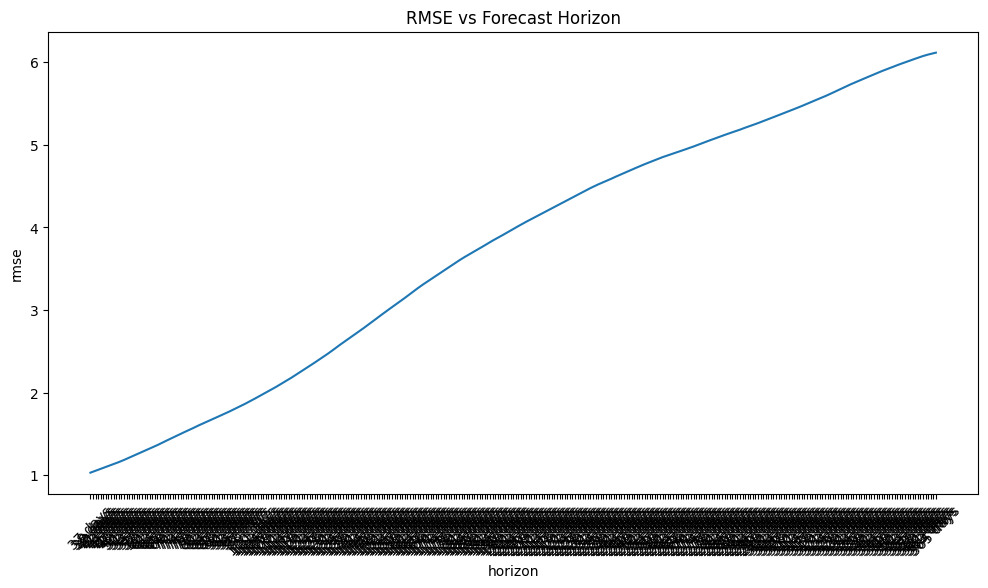

In [10]:
df_cv = cross_validation(
    model,
    initial='1000 days',
    period='180 days',
    horizon='365 days'
)

df_perf = performance_metrics(df_cv)

plt.figure(figsize=(12,6))
sns.lineplot(x=df_perf['horizon'].astype(str), y=df_perf['rmse'])
plt.title("RMSE vs Forecast Horizon")
plt.xticks(rotation=45)
plt.show()


In [11]:
future = prophet_df.drop(columns=['y']).copy()
forecast = model.predict(future)


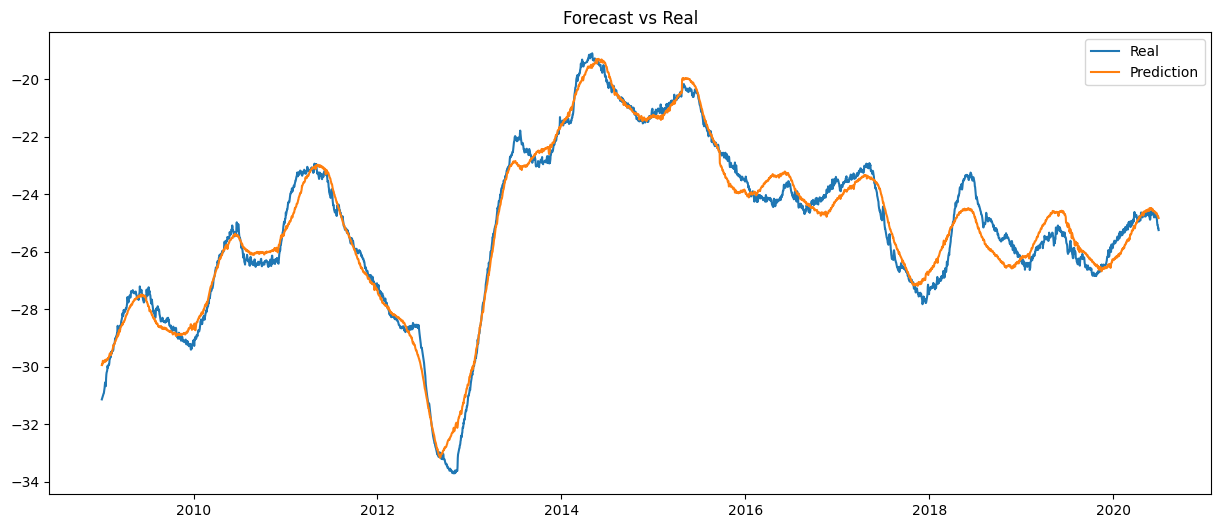

In [12]:
plt.figure(figsize=(15,6))

plt.plot(prophet_df['ds'], prophet_df['y'], label='Real')
plt.plot(forecast['ds'], forecast['yhat'], label='Prediction')

plt.legend()
plt.title("Forecast vs Real")
plt.show()


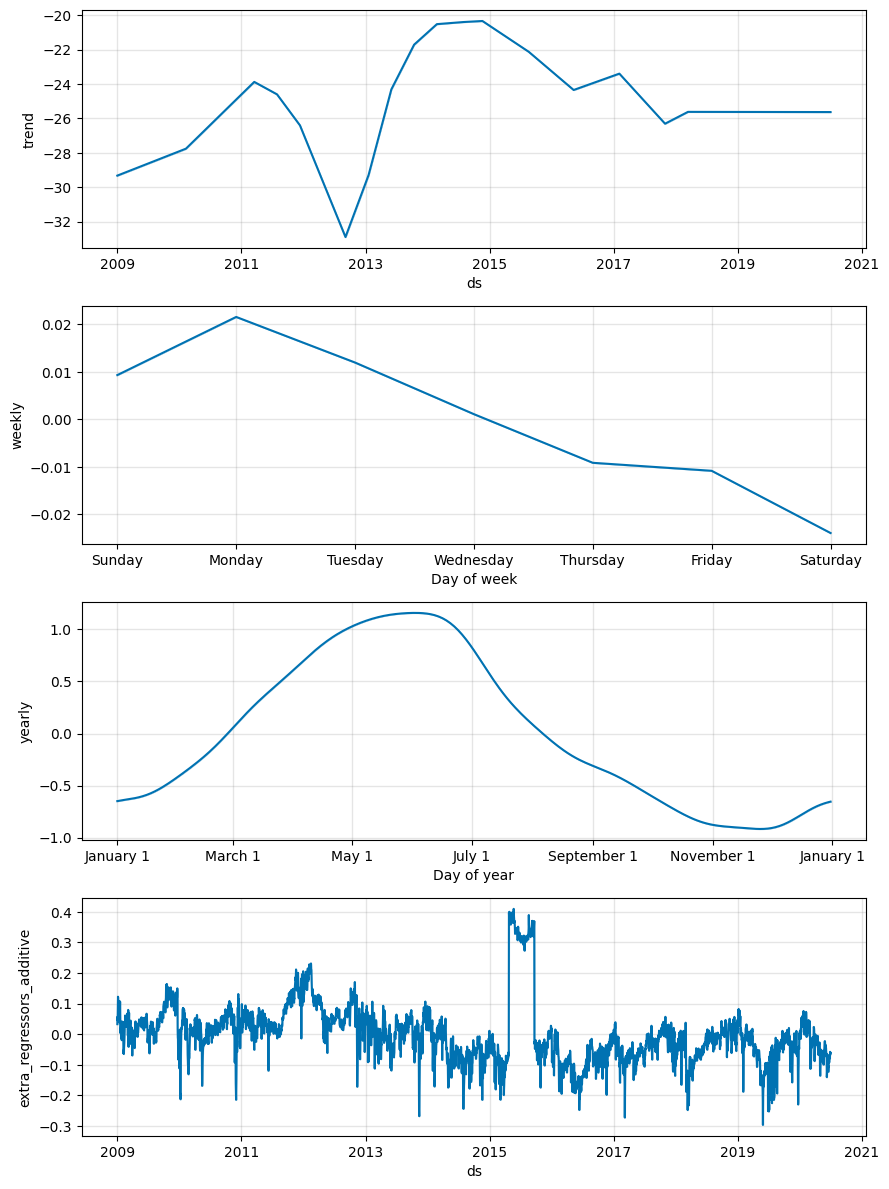

In [13]:
model.plot_components(forecast)
plt.show()
